In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('fivethirtyeight')
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
data=pd.read_excel('全国统计数据.xls') 
data

,年份,全国总人口,城镇,乡村,男性,女性,0-14岁,15-59,60岁及以上,65岁及以上,...,城市商品零售价格指数((上年=100)),固定资产投资价格指数((上年=100)),工业品出厂价格指数((上年=100)),财政收入(万元),财政支出(万元),失业保险参保人数(万人),基本养老保险参保人数(万人),基本养老保险基金收入(万元),基本养老保险基金累计结余(万元),基本养老保险基金支出(万元)
0,2008,132802,60667,72135,68357,64445,25166,91647,15989,10956,...,105.500000,108.900000,106.900000,6.133035e+08,6.259266e+08,12399.8,21891.100000,9.740200e+07,9.931000e+07,7.389600e+07
1,2009,133474,62186,71288,68652,64822,24663,92097,16714,11309,...,98.700000,97.600000,94.600000,6.851830e+08,7.629993e+08,12715.5,23549.900000,1.149080e+08,1.252610e+08,8.894400e+07
2,2010,137054,65000,68000,68685,65287,22246,93962,17765,11883,...,102.800000,103.600000,105.500000,8.310151e+08,8.987416e+08,13375.6,35984.100000,1.387290e+08,1.578780e+08,1.075530e+08
3,2011,134735,69079,65656,69068,65667,22164,94072,18499,12288,...,104.700000,106.600000,106.000000,1.038744e+09,1.092478e+09,14317.1,61573.300000,1.800480e+08,2.072780e+08,1.336320e+08
4,2012,135404,71182,64222,69395,66009,22287,93727,19390,12714,...,101.900000,101.100000,98.300000,1.172535e+09,1.259530e+09,15224.7,78796.300000,2.183020e+08,2.624350e+08,1.671150e+08
5,2013,136072,73111,62961,69728,66344,23875,91954,20243,13161,...,101.300000,100.300000,98.100000,1.292096e+09,1.402121e+09,16416.8,81968.400000,2.473260e+08,3.127480e+08,1.981870e+08
6,2014,136782,74916,61866,70079,66703,23957,91583,21242,13755,...,101.000000,100.500000,98.100000,1.403700e+09,1.517856e+09,17042.6,84231.900000,2.761990e+08,3.564450e+08,2.332580e+08
7,2015,137462,77116,60346,70414,67048,24166,91096,22200,14386,...,100.000000,98.200000,94.800000,1.522692e+09,1.758778e+09,17326.0,85833.400000,3.219550e+08,3.993710e+08,2.792940e+08
8,2016,138271,79298,58973,70815,67456,24438,90747,23086,15003,...,100.700000,99.400000,98.600000,1.596050e+09,1.877552e+09,18088.8,88776.800000,3.799080e+08,4.396520e+08,3.400430e+08
9,2017,139008,81347,57661,71137,67871,24719,90199,24090,15831,...,101.100000,105.800000,106.300000,1.725670e+09,2.033300e+09,18784.2,91548.300000,4.661380e+08,5.020220e+08,4.042380e+08


In [18]:
year=data['年份']
y=data['65岁及以上']
del data['年份']
x=data
y_train=y.iloc[1:]
y_train=np.reshape(y_train.values, (-1,1))  
x_train=x.iloc[:-1,:]
x_test=x.iloc[-1,:]
x_train_columns=x_train.columns

In [19]:
#归一化
from sklearn.preprocessing import MinMaxScaler
mm_x= MinMaxScaler()
mm_y= MinMaxScaler()
x_train= mm_x.fit_transform(x_train)
y_train= mm_y.fit_transform(y_train)

E:\anoconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


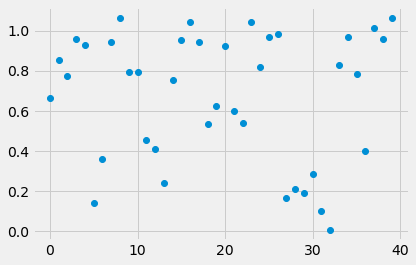

In [20]:
record=[]
from sklearn.feature_selection import mutual_info_regression
feature_info = mutual_info_regression(x_train,y_train)
plt.plot(feature_info,'o', label = 'feature_info')
record.append(feature_info)

In [21]:
seleted_feature1=[]
score=sorted(feature_info)[-7]
for i in range(len(x_train_columns)):
    if feature_info[i]>=score:
        seleted_feature1.append(x_train_columns[i])
print('保留下来的特征：',seleted_feature1)
record.append(seleted_feature1)

保留下来的特征： ['65岁及以上', '65+比', '第三产业增加值(亿元)', '居民最终消费支出(亿元)', '政府最终消费支出(亿元)', '财政支出(万元)', '基本养老保险基金收入(万元)', '基本养老保险基金支出(万元)']


[ 0.03313921  0.         -0.          0.22910173  0.         -0.
 -0.          0.          0.18935083  0.         -0.         -0.02224159
  0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.          0.
  0.04400923  0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.12969342  0.          0.30953413]


E:\anoconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012092157170238722, tolerance: 0.0001049976886754571
  positive)


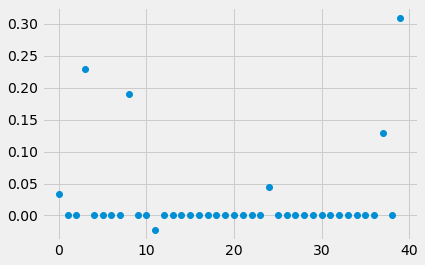

In [22]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=.002)
lasso.fit(x_train, y_train)
print(lasso.coef_)
plt.plot(lasso.coef_,'o', label = 'lasso')
record.append(lasso.coef_)

In [23]:
seleted_feature2=[]
for i in range(len(x_train_columns)):
    if lasso.coef_[i]!=0:
        seleted_feature2.append(x_train_columns[i])
print('保留下来的特征：',seleted_feature2)
record.append(seleted_feature2)

保留下来的特征： ['全国总人口', '男性', '65岁及以上', '男性比', '第三产业占GDP的比重(%)', '基本养老保险基金收入(万元)', '基本养老保险基金支出(万元)']


[ 0.03313921  0.         -0.          0.22910173  0.         -0.
 -0.          0.          0.18935083  0.         -0.         -0.02224159
  0.         -0.         -0.          0.          0.          0.
 -0.          0.          0.         -0.         -0.          0.
  0.04400923  0.          0.          0.         -0.         -0.
 -0.         -0.         -0.          0.          0.          0.
  0.          0.12969342  0.          0.30953413]


E:\anoconda\lib\site-packages\sklearn\linear_model\coordinate_descent.py:475: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 0.00012092157170238722, tolerance: 0.0001049976886754571
  positive)


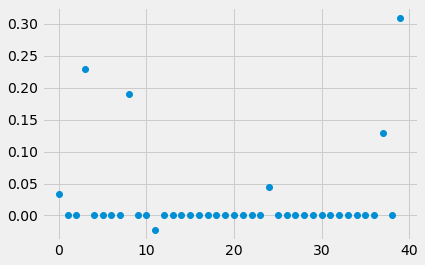

In [24]:
from sklearn.linear_model import ElasticNet
enet=ElasticNet(alpha=.002,l1_ratio=1)
enet.fit(x_train, y_train)
print(enet.coef_)
plt.plot(enet.coef_,'o', label = 'Elastic net')
record.append(enet.coef_)

In [25]:
seleted_feature3=[]
for i in range(len(x_train_columns)):
    if enet.coef_[i]!=0:
        seleted_feature3.append(x_train_columns[i])
print('保留下来的特征：',seleted_feature3)
record.append(seleted_feature3)

保留下来的特征： ['全国总人口', '男性', '65岁及以上', '男性比', '第三产业占GDP的比重(%)', '基本养老保险基金收入(万元)', '基本养老保险基金支出(万元)']


In [26]:
pd.DataFrame(record).to_excel('feature_selected.xlsx')

In [27]:
data[seleted_feature3]

,全国总人口,男性,65岁及以上,男性比,第三产业占GDP的比重(%),基本养老保险基金收入(万元),基本养老保险基金支出(万元)
0,132802,68357,10956,51.50,42.900000,9.740200e+07,7.389600e+07
1,133474,68652,11309,51.40,44.400000,1.149080e+08,8.894400e+07
2,137054,68685,11883,51.27,44.100000,1.387290e+08,1.075530e+08
3,134735,69068,12288,51.30,44.300000,1.800480e+08,1.336320e+08
4,135404,69395,12714,51.30,45.500000,2.183020e+08,1.671150e+08
5,136072,69728,13161,51.20,46.900000,2.473260e+08,1.981870e+08
6,136782,70079,13755,51.20,48.000000,2.761990e+08,2.332580e+08
7,137462,70414,14386,51.20,50.500000,3.219550e+08,2.792940e+08
8,138271,70815,15003,51.20,51.800000,3.799080e+08,3.400430e+08
9,139008,71137,15831,51.20,51.900000,4.661380e+08,4.042380e+08


In [28]:
#重新构建数据集的特征
x=data[seleted_feature3]
x_train=x.iloc[:-1,:]
x_test=x.iloc[-1,:]

In [29]:
#归一化
from sklearn.preprocessing import MinMaxScaler
mm_x= MinMaxScaler()
x_train= mm_x.fit_transform(x_train)
print(x_train.shape)#通过输出训练集测试集的大小来判断数据格式正确。
print(y_train.shape)

(11, 7)
(11, 1)


In [30]:
#以下函数均为对模型进行检验所用到的 精简代码的作用
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true)) * 100
def up_down_accuracy(y_true, y_pred):
    y_var_test=y_true[1:]-y_true[:len(y_true)-1]#实际涨跌
    y_var_predict=y_pred[1:]-y_pred[:len(y_pred)-1]#原始涨跌
    txt=np.zeros(len(y_var_test))
    for i in range(len(y_var_test-1)):#计算数量
        txt[i]=np.sign(y_var_test[i])==np.sign(y_var_predict[i])
    result=sum(txt)/len(txt)
    return result
def output(model,X_train,y_train):
    #在训练集上的拟合结果
    y_train_predict=model.predict(X_train)
    y_train_predict=np.reshape(y_train_predict, (-1,1))  
    # 反归一化
    y_train_predict= mm_y.inverse_transform(y_train_predict)
    y_train=mm_y.inverse_transform(y_train)
    #展示在训练集上的表现 
    draw=pd.concat([pd.DataFrame(y_train),pd.DataFrame(y_train_predict)],axis=1)
    draw.iloc[:,0].plot(figsize=(12,6))
    draw.iloc[:,1].plot(figsize=(12,6))
    plt.legend(('real', 'predict'),fontsize='15')
    plt.title("Train Data",fontsize='30') #添加标题
    plt.show()
    #输出结果
    print('训练集上的MAE/MSE/MAPE/涨跌准确率')
    print(mean_absolute_error(y_train_predict, y_train))
    print(mean_squared_error(y_train_predict, y_train) )
    print(mape(y_train_predict, y_train) )
    print(up_down_accuracy(y_train_predict,y_train))
    x_test=x.iloc[-1,:]
    #进行实际预测
    x_test=np.reshape(x_test.values, (1,-1))  
    y_test_predict=model.predict(x_test)
    y_test_predict=np.reshape(y_test_predict, (-1,1))  
    y_test_predict= mm_y.inverse_transform(y_test_predict)
    print('最终预测为：',y_test_predict)

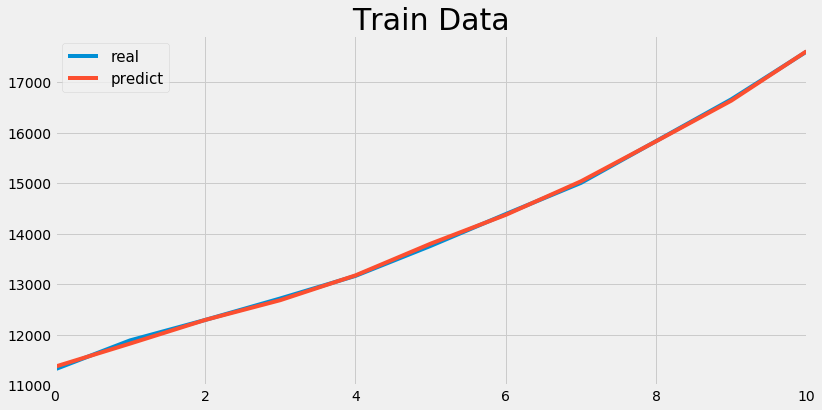

训练集上的MAE/MSE/MAPE/涨跌准确率
26.08698777655445
1081.311809662202
0.19946792367710425
1.0
最终预测为： [[1.39108597e+12]]


In [31]:
# 建立线性回归模型 预测
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
model = lr.fit(x_train, y_train) 
output(model,x_train, y_train)

In [32]:
print('coef:',model.coef_)
print('intercept:',model.intercept_)

coef: [[-0.00376877  0.16293201  0.24234211 -0.08764628  0.01207816 -0.0998283
   0.59125496]]
intercept: [0.09593822]


In [33]:
record=[]
record.append(model.coef_)
record.append(model.intercept_)

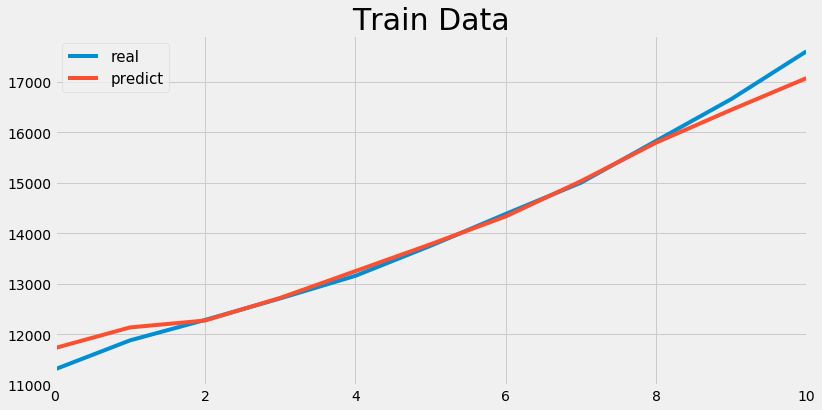

训练集上的MAE/MSE/MAPE/涨跌准确率
152.81065553118472
53112.35751845262
1.0880448669939278
1.0
最终预测为： [[1.17127901e+12]]


In [34]:
#弹性网回归及其结果
from sklearn.linear_model import ElasticNet
elasticnet=ElasticNet(alpha=.01, l1_ratio=1, random_state=3)
model = elasticnet.fit(x_train, y_train)
output(model,x_train, y_train)

In [35]:
record.append(model.coef_)
record.append(model.intercept_)
pd.DataFrame(record).to_excel('coef of linear regression.xlsx')

E:\anoconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


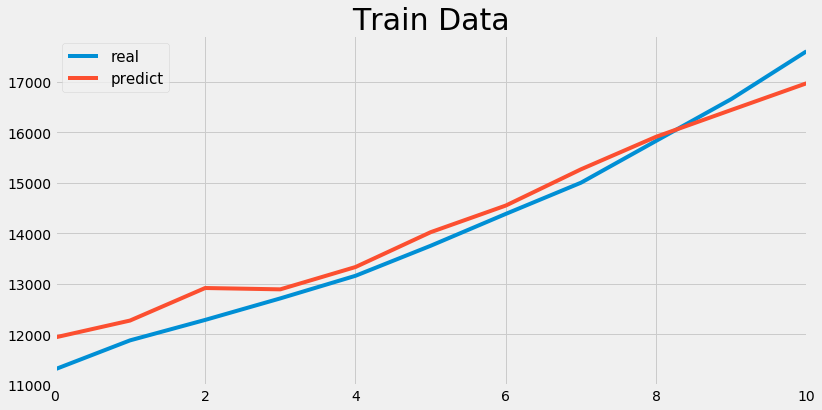

训练集上的MAE/MSE/MAPE/涨跌准确率
330.46998485141506
148728.31474796584
2.399169951832852
0.9
最终预测为： [[14492.21430683]]


In [36]:
#支持向量机及其结果
from sklearn.svm import SVR
svr=SVR(C=.8, epsilon=0.1)
model = svr.fit(x_train, y_train)
output(model,x_train, y_train)

E:\anoconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


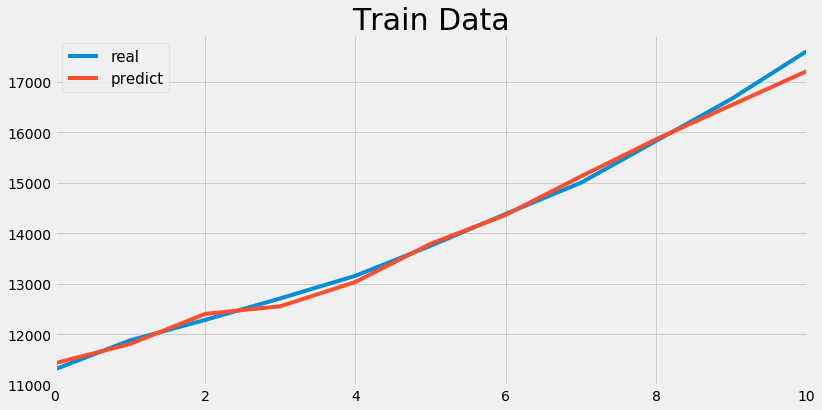

训练集上的MAE/MSE/MAPE/涨跌准确率
119.98890377116616
23835.45576790153
0.8424306396337733
1.0
最终预测为： [[14236.09764677]]


In [37]:
#支持向量机及其结果
from sklearn.svm import NuSVR 
nusvr = NuSVR() 
model = nusvr.fit(x_train, y_train)
output(model,x_train, y_train)

E:\anoconda\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
E:\anoconda\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


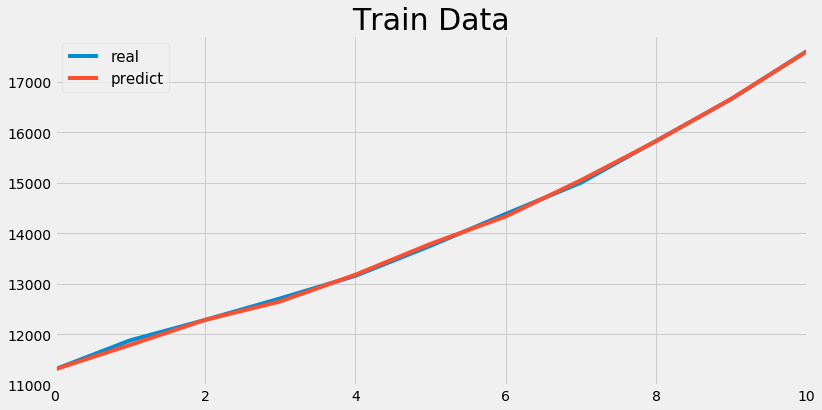

训练集上的MAE/MSE/MAPE/涨跌准确率
29.604413650044247
1688.7334823786289
0.22312569627029252
1.0
最终预测为： [[1.51524583e+12]]


In [565]:
#支持向量机及其结果
from sklearn.svm import LinearSVR  
svr = LinearSVR() 
model = svr.fit(x_train, y_train)
output(model,x_train, y_train)

E:\anoconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
E:\anoconda\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  after removing the cwd from sys.path.


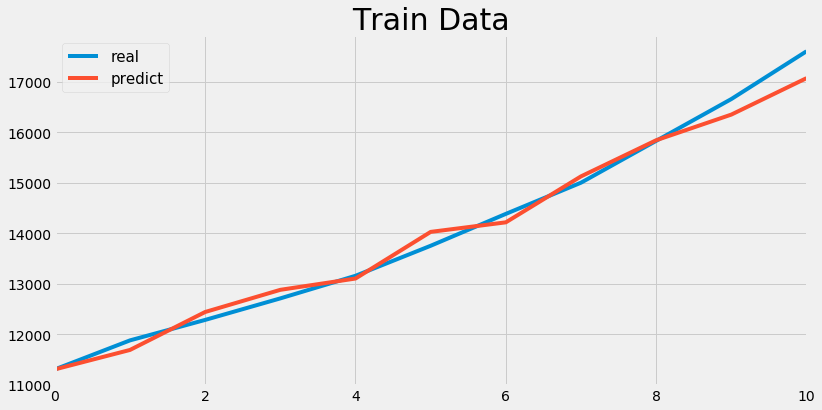

训练集上的MAE/MSE/MAPE/涨跌准确率
180.59999999999954
53466.032727272315
1.2390674497748915
1.0
最终预测为： [[16232.3]]


In [566]:
# 建立随机森林模型 预测
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor()
model = rf.fit(x_train, y_train) 
output(model,x_train, y_train)

E:\anoconda\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:1321: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


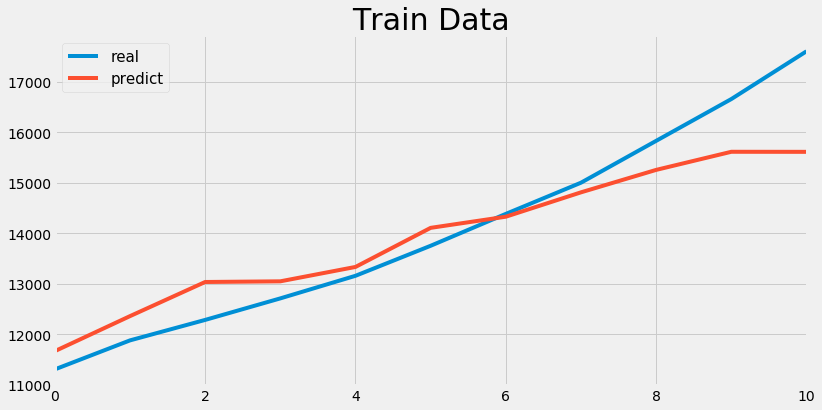

训练集上的MAE/MSE/MAPE/涨跌准确率
573.8478883646408
600968.4210712225
4.000779566793415
0.9
最终预测为： [[-3.97038794e+11]]


In [567]:
from sklearn.neural_network import MLPRegressor
# alpha:L2的参数：MLP是可以支持正则化的，默认为L2，具体参数需要调整
# hidden_layer_sizes=(5, 2) hidden层2层,第一层5个神经元，第二层2个神经元)，2层隐藏层，也就有3层神经网络
#clf = MLPRegressor(solver='lbfgs', alpha=1e-5,hidden_layer_sizes=(5, 2), random_state=1)
#'identity'，无操作激活，对实现线性瓶颈很有用，返回f（x）= x
#'logistic'，logistic sigmoid函数，返回f（x）= 1 /（1 + exp（-x））。
#'tanh'，双曲tan函数，返回f（x）= tanh（x）。
#'relu'，整流后的线性单位函数，返回f（x）= max（0，x）
NN= MLPRegressor(
    hidden_layer_sizes=(8,4),  activation='relu', solver='adam', alpha=0.0001, batch_size='auto',
    learning_rate='constant', learning_rate_init=0.001, power_t=0.5, max_iter=5000, shuffle=True,
    random_state=1, tol=0.0001, verbose=False, warm_start=False, momentum=0.9, nesterovs_momentum=True,
    early_stopping=False,beta_1=0.9, beta_2=0.999, epsilon=1e-08)
model = NN.fit(x_train, y_train)
output(model,x_train, y_train)